![](images/EscUpmPolit_p.gif "UPM")

# Kaggle Challenge
## Loan Approval Prediction - New York
El reto consiste en aplicar algoritmos de Machine Learning para predecir la emisión de créditos a un cliente en función de un dataset de entrada para el entrenamiento correspondiente.

El dataset está formado por los siguientes campos:

- id # Text # Identifier of the data instance
- LoanNr_ChkDgt # Text # Identifier of the loan petition
- Name # Text # Borrower name
- City # Text # Borrower city
- State # Text # Borrower state
- Bank # Text # Bank name
- BankState # Text # Bank state
- ApprovalDate # Date/Time # Date SBA commitment issued
- ApprovalFY # Text # Fiscal year of commitment
- NoEmp # Number # Number of business employees
- NewExist # Text # 1 = Existing business, 2 = New business
- CreateJob # Number # Number of jobs created
- RetainedJob # Number # Number of jobs retained
- FranchiseCode # Text # Franchise code, (00000 or 00001) = No franchise
- UrbanRural # Text # 1 = Urban, 2 = rural, 0 = undefined
- RevLineCr # Text # Revolving line of credit: Y = Yes, N = No
- LowDoc # Text # LowDoc Loan Program: Y = Yes, N = No
- DisbursementDate # Date/Time # Disbursement date
- DisbursementGross # Currency # Amount disbursed
- BalanceGross # Currency # Gross amount outstanding
- Accept # Text # Loan approval status. 0 = not approved, 1 = approved


## 1º Paso: Importar datos

In [75]:
from datetime import datetime
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Training and test spliting
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn import preprocessing
from skfeature.function.similarity_based import fisher_score

# Estimators
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.naive_bayes import BernoulliNB

# Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Optimization
#from sklearn.model_selection import GridSearchCV

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [76]:
train = pd.read_csv('data_reto_1/train.csv')
train

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,b353a0b461c,3354343008,"TOGETHER GARGOYLES, INC.",BROOKLYN,NY,JPMORGAN CHASE BANK NATL ASSOC,NY,21-Dec-88,1989,20,...,0,0,0,0,N,N,30-Apr-89,"$350,000.00",$0.00,1
1,cca24bbcc48,2349745003,LAWRENCE K. ALTHISER DBA LARRY,HARTWICK,NY,CITIZENS BANK NATL ASSOC,RI,23-Mar-07,2007,3,...,1,4,0,2,N,N,30-Apr-07,"$35,000.00",$0.00,1
2,e60644381ce,6007284009,TAAMEER CONSTRUCTION INC,BROOKLYN (BOROUGH OF NEW YORK),NY,JPMORGAN CHASE BANK NATL ASSOC,IL,9-Jan-03,2003,5,...,0,5,1,1,0,N,31-Jan-03,"$50,000.00",$0.00,1
3,ffca41a2760,6047703002,"CENTRAL CONTROL SYSTEMS, INC.",SYRACUSE,NY,MANUFACTURERS & TRADERS TR CO,NY,10-Nov-93,1994,25,...,0,0,1,0,N,N,31-Jan-94,"$190,000.00",$0.00,1
4,79e48255003,6590164004,METRO SALON,ROCHESTER,NY,MANUFACTURERS & TRADERS TR CO,NY,14-Aug-03,2003,6,...,0,0,1,1,0,Y,30-Sep-03,"$30,000.00",$0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40380,8db591edafe,1238924005,"NBFD, INC.",OLEAN,NY,COMMUNITY BANK NATL ASSOC,NY,15-May-97,1997,25,...,0,0,1,0,N,Y,3-Jun-97,"$50,000.00",$0.00,1
40381,e1e96f4af51,3681885006,Altman Stage Lighting Co.,YONKERS,NY,EH NATIONAL BANK,CA,7-Oct-09,2010,100,...,10,100,0,1,N,N,7-Oct-09,"$1,666,600.00",$0.00,1
40382,29aabac46d9,1497375007,Paws & Claws Pet Boutique LLC,SEAFORD,NY,HSBC BK USA NATL ASSOC,NY,13-Oct-05,2006,1,...,0,1,0,1,N,N,30-Apr-06,"$25,000.00",$0.00,1
40383,2ed947e57f5,1757175003,Bay Medical Supplies Inc,BROOKLYN,NY,HSBC BK USA NATL ASSOC,NY,10-Apr-06,2006,1,...,0,1,0,1,Y,N,31-May-06,"$73,363.00",$0.00,1


De acuerdo a los datos mostrados, se puede intuir que las variables asociadas a la prediccion del riesgo son:
- ApprovalDate y DisbursementDate, ambas determinan la fecha en que la SBA ha aceptado la solicitud y la fecha en que ha concedido el préstamo. Se podría calcular la diferencia entre ellas.
- NoEmp, la cantidad de empleados puede determinar que tan grande o pequeña es la empresa.
- NewExist, si es una empresa que recién esta empezando su actividad podría afectar la concesión del préstamo.
- CreateJob, si se han creado fuentes de empleo puede ser un indicador del crecimiento de la empresa.
- RetainedJob, representa la cantidad de empleos a tiempo completo existentes al momento de hacer la solicitud y que se mantendrán en caso de conseguir la aprobación.
- RevLineCr, representa el hecho de que tan pronto como se pague la deuda, la empresa puede volver a pedir prestado hasta su límite de crédito sin pasar por otro proceso de aprobación de préstamo.
- LowDoc, de ser verdadero significa que el SBA promete un procesamiento rápido (para montos inferiores a $150,000).
- DisbursementGross, la cantidad que se esta solicitando es importante en conjunto con el resto de parámetros para poder determinar la aprobación del préstamo.
- Accept, el campo más importante porque indica si se ha cedido o no el préstamo.

Sin embargo, revisaremos cada columna para comprobarlo.

##  2º Paso: Limpieza de datos

Se eliminarán campos irrelevantes o no necesarios. Para esto se debe analizar los datos numéricos, revisar si hay datos faltantes o nulos y completarlos, y eliminar columnas no necesarias. Luego hacer lo mismo con los no numéricos e incluso cambiar el tipo de dato si así se considera.

In [77]:
#Dataframe information from each column
df_train = train.copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40385 entries, 0 to 40384
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40385 non-null  object 
 1   LoanNr_ChkDgt      40385 non-null  int64  
 2   Name               40382 non-null  object 
 3   City               40385 non-null  object 
 4   State              40385 non-null  object 
 5   Bank               40340 non-null  object 
 6   BankState          40338 non-null  object 
 7   ApprovalDate       40385 non-null  object 
 8   ApprovalFY         40385 non-null  object 
 9   NoEmp              40385 non-null  int64  
 10  NewExist           40378 non-null  float64
 11  CreateJob          40385 non-null  int64  
 12  RetainedJob        40385 non-null  int64  
 13  FranchiseCode      40385 non-null  int64  
 14  UrbanRural         40385 non-null  int64  
 15  RevLineCr          40250 non-null  object 
 16  LowDoc             403

In [78]:
#Let's see if there's any duplicate
df_train.duplicated().any()

False

In [79]:
#statistics from numeric columns
df_train.describe()

,LoanNr_ChkDgt,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,Accept
count,4.038500e+04,40385.000000,40378.000000,40385.000000,40385.000000,40385.000000,40385.00000,40385.000000
mean,4.459565e+09,9.485750,1.279013,4.273666,7.128191,1218.894342,0.76885,0.796360
std,2.539048e+09,54.872591,0.451107,151.989529,152.156119,8647.991363,0.59020,0.402709
min,1.000655e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.276314e+09,2.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000
50%,3.804294e+09,4.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000
75%,6.409913e+09,9.000000,2.000000,1.000000,5.000000,1.000000,1.00000,1.000000
max,9.995413e+09,9999.000000,2.000000,8800.000000,8800.000000,91110.000000,2.00000,1.000000


Observando el resultado anterior, se puede determinar que el atributo LoanNr_ChkDgt es un identificador que no aporta a la predicción.

In [80]:
df_train.drop(['LoanNr_ChkDgt'], axis=1, inplace=True)

In [81]:
#Let`s see null or missing values for numeric atributes
df_train.isnull().sum()

id                     0
Name                   3
City                   0
State                  0
Bank                  45
BankState             47
ApprovalDate           0
ApprovalFY             0
NoEmp                  0
NewExist               7
CreateJob              0
RetainedJob            0
FranchiseCode          0
UrbanRural             0
RevLineCr            135
LowDoc                55
DisbursementDate     131
DisbursementGross      0
BalanceGross           0
Accept                 0
dtype: int64

La columna NewExist posee valores nulos, por lo que se reemplazan con aquel que más se repite.

In [82]:
df_train.groupby('NewExist').size()

NewExist
0.0       47
1.0    29018
2.0    11313
dtype: int64

In [83]:
df_train['NewExist'].fillna(1.0, inplace=True)
df_train.loc[df_train["NewExist"] == 0.0, "NewExist"] = 1.0

Al revisar los datos no numéricos, se considera que las siguientes columnas no son relevantes al momento de determinar el riesgo ya que aportan solamente información complementaria de la solicitud:
- Name
- City
- State
- Bank
- BankState
- ApprovalFY

Por otro lado, se revisan las columnas que contengan valores nulos para reemplazarlos y/o rellenarlos.

In [84]:
df_train.drop(['Name', 'City', 'State', 'Bank', 'BankState', 'ApprovalFY'], axis=1, inplace=True)

Se observa que para RevLineCr solo se pueden dar dos posibles valores (Y o N) pero se tienen otros (0 y T). Asumiremos, que aquellos que tienen 0 es un N y aquellos con T es un Y. Una vez hecho esto, se rellenan los nulos con el que más se repita.

In [85]:
df_train.groupby('RevLineCr').size()

RevLineCr
0     8671
N    17540
T      744
Y    13295
dtype: int64

In [86]:
df_train.loc[df_train["RevLineCr"] == "0", "RevLineCr"] = 'N'
df_train.loc[df_train["RevLineCr"] == "T", "RevLineCr"] = 'Y'
df_train.groupby('RevLineCr').size()

RevLineCr
N    26211
Y    14039
dtype: int64

In [87]:
df_train['RevLineCr'].fillna('N', inplace=True)

Un caso similar ocurre con LowDoc, sin embargo, no podemos asumir cual es Y y N. Por lo tanto, simplemente reemplazamos todos aquellos que no correspondan por el que más se repite.

In [88]:
df_train.groupby('LowDoc').size()

LowDoc
0       13
A       11
C       16
N    36575
R        1
S       10
Y     3704
dtype: int64

In [89]:
df_train['LowDoc'].fillna('N', inplace=True)
df_train.loc[df_train["LowDoc"] == "0", "LowDoc"] = 'N'
df_train.loc[df_train["LowDoc"] == "A", "LowDoc"] = 'N'
df_train.loc[df_train["LowDoc"] == "C", "LowDoc"] = 'N'
df_train.loc[df_train["LowDoc"] == "R", "LowDoc"] = 'N'
df_train.loc[df_train["LowDoc"] == "S", "LowDoc"] = 'N'

Revisamos la columna BalanceGross y notamos que todos sus valores son iguales, por lo que no representaría relevancia en la predicción.

In [90]:
df_train.groupby('BalanceGross').size()

BalanceGross
$0.00     40385
dtype: int64

In [91]:
df_train.drop(['BalanceGross'], axis=1, inplace=True)

Luego, categorizamos y convertimos el tipo de dato de cada columna como se muestra a continuación:
- id, object -> string
- ApprovalDate y DisbursementDate, object -> string
- NewExists, float64 -> int64
- RevLineCr, object -> int64
- LowDoc, object -> int64
- DisbursementGross, object -> float64

Además, calculamos el periodo de tiempo (en días) desde que se solicita hasta que se aprueba el préstamo.

In [63]:
df_train['id'] = df_train['id'].astype(str)
df_train['ApprovalDate'] = df_train['ApprovalDate'].astype(str)
df_train['DisbursementDate'] = df_train['DisbursementDate'].astype(str)
df_train['NewExist'] = df_train['NewExist'].astype(np.int64)

df_train.loc[df_train["RevLineCr"] == "N", "RevLineCr"] = 0
df_train.loc[df_train["RevLineCr"] == "Y", "RevLineCr"] = 1
df_train['RevLineCr'] = df_train['RevLineCr'].astype(np.int64)

df_train.loc[df_train["LowDoc"] == "N", "LowDoc"] = 0
df_train.loc[df_train["LowDoc"] == "Y", "LowDoc"] = 1
df_train['LowDoc'] = df_train['LowDoc'].astype(np.int64)

df_train["DisbursementGross"] = df_train["DisbursementGross"].astype(str)
df_train["DisbursementGross"] = df_train["DisbursementGross"].apply(lambda x: x[1:])
df_train["DisbursementGross"] = df_train["DisbursementGross"].apply(lambda s: s.strip())
df_train["DisbursementGross"] = df_train["DisbursementGross"].replace({',':''}, regex=True)
df_train.loc[df_train["DisbursementGross"] == "", "DisbursementGross"] = 0
df_train["DisbursementGross"] = df_train["DisbursementGross"].astype(float)

#Para calcular el periodo de aprobación, hay que obtener las fechas y restarlas
df_train["ApprovalDate"] = df_train["ApprovalDate"].apply(lambda date: datetime.strptime(date, "%d-%b-%y"))
#En DisbursementDate hay valores sin fecha, los dejaremos en blanco
df_train["DisbursementDate"] = df_train["DisbursementDate"].apply(lambda date: datetime.strptime(date, "%d-%b-%y") if (date!="nan") else '')
df_train.insert(1, 'ApprovalPeriod', df_train["DisbursementDate"] - df_train["ApprovalDate"])
#Rellenamos los valores en blanco con el promedio ApprovalPeriod
df_train['ApprovalPeriod'].fillna(df_train['ApprovalPeriod'].mean(), inplace=True)
df_train["ApprovalPeriod"] = df_train["ApprovalPeriod"].apply(lambda t: t/np.timedelta64(1, 'D'))
df_train["ApprovalPeriod"] = df_train["ApprovalPeriod"].astype(np.int64)
df_train.drop(['ApprovalDate', 'DisbursementDate'], axis=1, inplace=True)

In [69]:
df_train.ApprovalPeriod.describe()

count    40385.000000
mean       128.843432
std        206.586043
min        -99.000000
25%         31.000000
50%         62.000000
75%        133.000000
max       4126.000000
Name: ApprovalPeriod, dtype: float64

Tal parece que ApprovalPeriod tiene valores negativos, esto puede mejorarse. Lo cambiaremos por la media.

In [70]:
df_train.drop(['ApprovalPeriod'], axis=1, inplace=True)

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40385 entries, 0 to 40384
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40385 non-null  object 
 1   NoEmp              40385 non-null  int64  
 2   NewExist           40385 non-null  int64  
 3   CreateJob          40385 non-null  int64  
 4   RetainedJob        40385 non-null  int64  
 5   FranchiseCode      40385 non-null  int64  
 6   UrbanRural         40385 non-null  int64  
 7   RevLineCr          40385 non-null  int64  
 8   LowDoc             40385 non-null  int64  
 9   DisbursementGross  40385 non-null  float64
 10  Accept             40385 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 3.4+ MB


In [72]:
df_train.isnull().any()

id                   False
NoEmp                False
NewExist             False
CreateJob            False
RetainedJob          False
FranchiseCode        False
UrbanRural           False
RevLineCr            False
LowDoc               False
DisbursementGross    False
Accept               False
dtype: bool

In [73]:
df_train

,id,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,Accept
0,b353a0b461c,20,1,0,0,0,0,0,0,350000.0,1
1,cca24bbcc48,3,1,1,4,0,2,0,0,35000.0,1
2,e60644381ce,5,1,0,5,1,1,0,0,50000.0,1
3,ffca41a2760,25,1,0,0,1,0,0,0,190000.0,1
4,79e48255003,6,1,0,0,1,1,0,1,30000.0,1
...,...,...,...,...,...,...,...,...,...,...,...
40380,8db591edafe,25,2,0,0,1,0,0,1,50000.0,1
40381,e1e96f4af51,100,1,10,100,0,1,0,0,1666600.0,1
40382,29aabac46d9,1,2,0,1,0,1,0,0,25000.0,1
40383,2ed947e57f5,1,2,0,1,0,1,1,0,73363.0,1


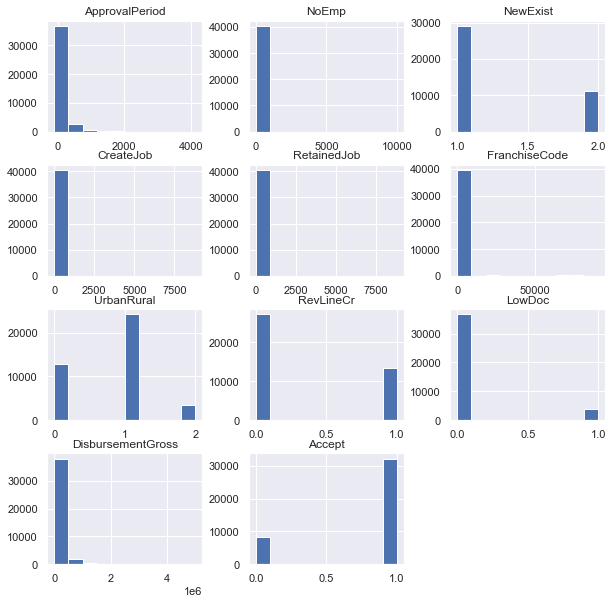

In [25]:
%matplotlib inline
df_train.hist(figsize=(10,10))
plt.show()

<AxesSubplot:>

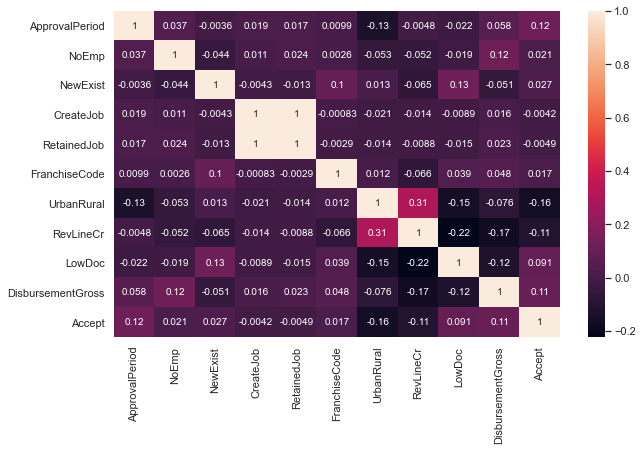

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(), annot=True)

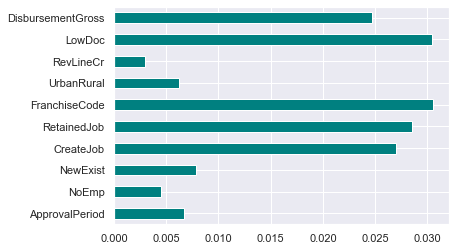

In [32]:
from sklearn.feature_selection import mutual_info_classif
# Features of the model
features = ['NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr','LowDoc','DisbursementGross', 'ApprovalPeriod']
# Transform dataframe in numpy arrays and split
x_train = df_train[features].values
y_train = df_train['Accept'].values

importances = mutual_info_classif(x_train, y_train)

feat_importances = pd.Series(importances, df_train.columns[1:len(df_train.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show()

# 3º Paso: Algoritmo ML
El algoritmo secreto es Bernoulli Naive Bayes

## Train and test splitting

In [74]:
# Features of the model
features = ['NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr','LowDoc','DisbursementGross', 'ApprovalPeriod']
# Transform dataframe in numpy arrays and split
#train_data = df.iloc[:40385,:]
x_train = df_train[features].values
y_train = df_train['Accept'].values

#test_data = df.iloc[40385:,:]
#ids = test_data['id'].values
#x_test = test_data[features].values

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.35, random_state=33)

## Define models

In [36]:
models = {"Logistic Regression": LogisticRegression(multi_class="auto", solver="lbfgs", max_iter=2000), \
          "Decision Tree": DecisionTreeClassifier(), \
          "Random Forest": RandomForestClassifier(n_estimators=100), \
          "Nearest Neighbors": KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree'), \
          "Perceptron": MLPClassifier(hidden_layer_sizes=(150,), activation='tanh', solver='lbfgs', alpha=0.03, max_iter=2000), \
          "Bernoulli": BernoulliNB(alpha=0.01, binarize=0.0, fit_prior=False, class_prior=None), \
          "SVC": SVC(C=5, kernel='rbf', gamma=0.01)}

models_1 = {"SVC_1": SVC(), \
          "SVC_2": SVC(C=10, kernel='rbf', gamma=0.001), \
          "SVC_3": SVC(C=100, kernel='rbf', gamma=0.001), \
          "SVC_4": SVC(C=1000, kernel='rbf', gamma=0.001)}


## Train and evaluate

In [28]:
i = 0
f1_global = []
for name in models_1:
    print("Start training models of {}".format(name))
    model = models[name].fit(X_train, Y_train)
    predicted = model.predict(X_test)
    f1_global.append(f1_score(Y_test, predicted, average="weighted"))
    print(confusion_matrix(Y_test, predicted))
    print(classification_report(Y_test, predicted))
    print("F1_score of %s is %s"%(name, f1_global[i]))
    print("Accuracy of %s is %s"%(name, accuracy_score(Y_test, predicted)))
    i+=1
    print("*************************************************************")
print("Global: f1={:.4f}\n".format(np.average(f1_global)))

Start training models of Logistic Regression
[[    0  2869]
 [    1 11265]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2869
           1       0.80      1.00      0.89     11266

    accuracy                           0.80     14135
   macro avg       0.40      0.50      0.44     14135
weighted avg       0.64      0.80      0.71     14135

0.7069706903899128
0.7969579059073223
Start training models of Decision Tree
[[1044 1825]
 [2082 9184]]
              precision    recall  f1-score   support

           0       0.33      0.36      0.35      2869
           1       0.83      0.82      0.82     11266

    accuracy                           0.72     14135
   macro avg       0.58      0.59      0.59     14135
weighted avg       0.73      0.72      0.73     14135

0.7279240188063603
0.7235939158118146
Start training models of Random Forest
[[  748  2121]
 [  819 10447]]
              precision    recall  f1-score   support

   

In [29]:
#Choose the best
clf = models['SVC']
clf.fit(x_train, y_train)

SVC(C=5, gamma=0.01)

In [37]:
clf = models['Perceptron']
clf.fit(x_train, y_train)

MLPClassifier(activation='tanh', alpha=0.03, hidden_layer_sizes=(150,),
              max_iter=2000, solver='lbfgs')

In [ ]:
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



## Prepare test data

In [30]:
df_test = pd.read_csv('data_reto_1/test_nolabel.csv')
df_test['NewExist'].fillna(1.0, inplace=True)
df_test.drop(['LoanNr_ChkDgt'], axis=1, inplace=True)
df_test.drop(['Name', 'City', 'State', 'Bank', 'BankState', 'ApprovalFY'], axis=1, inplace=True)
df_test['LowDoc'].fillna('N', inplace=True)
df_test['RevLineCr'].fillna('N', inplace=True)
df_test.drop(['BalanceGross'], axis=1, inplace=True)
df_test['DisbursementDate'].fillna('nan', inplace=True)

In [31]:
df_test['id'] = df_test['id'].astype(str)

df_test['ApprovalDate'] = df_test['ApprovalDate'].astype(str)

df_test['DisbursementDate'] = df_test['DisbursementDate'].astype(str)

df_test.loc[df_test["NewExist"] == 0.0, "NewExist"] = 1.0

df_test.loc[df_test["RevLineCr"] == "N", "RevLineCr"] = 0
df_test.loc[df_test["RevLineCr"] == "0", "RevLineCr"] = 0
df_test.loc[df_test["RevLineCr"] == "T", "RevLineCr"] = 0
df_test.loc[df_test["RevLineCr"] == "Y", "RevLineCr"] = 1
df_test['RevLineCr'] = df_test['RevLineCr'].astype(np.int64)

df_test.loc[df_test["LowDoc"] == "N", "LowDoc"] = 0
df_test.loc[df_test["LowDoc"] == "0", "LowDoc"] = 0
df_test.loc[df_test["LowDoc"] == "A", "LowDoc"] = 0
df_test.loc[df_test["LowDoc"] == "C", "LowDoc"] = 0
df_test.loc[df_test["LowDoc"] == "R", "LowDoc"] = 0
df_test.loc[df_test["LowDoc"] == "S", "LowDoc"] = 0
df_test.loc[df_test["LowDoc"] == "Y", "LowDoc"] = 1
df_test['LowDoc'] = df_test['LowDoc'].astype(np.int64)

df_test["DisbursementGross"] = df_test["DisbursementGross"].astype(str)
df_test["DisbursementGross"] = df_test["DisbursementGross"].apply(lambda x: x[1:])
df_test["DisbursementGross"] = df_test["DisbursementGross"].apply(lambda s: s.strip())
df_test["DisbursementGross"] = df_test["DisbursementGross"].replace({',':''}, regex=True)
df_test.loc[df_test["DisbursementGross"] == "", "DisbursementGross"] = 0
df_test["DisbursementGross"] = df_test["DisbursementGross"].astype(float)

df_test["ApprovalDate"] = df_test["ApprovalDate"].astype(str)
df_test["ApprovalDate"] = df_test["ApprovalDate"].apply(lambda date: datetime.strptime(date, "%d-%b-%y"))

df_test["DisbursementDate"] = df_test["DisbursementDate"].astype(str)
df_test["DisbursementDate"] = df_test["DisbursementDate"].apply(lambda date: datetime.strptime(date, "%d-%b-%y") if (date!="nan") else '')

df_test["ApprovalPeriod"] = df_test["DisbursementDate"] - df_test["ApprovalDate"]
df_test['ApprovalPeriod'].fillna(df_test['ApprovalPeriod'].mean(), inplace=True)
df_test["ApprovalPeriod"] = df_test["ApprovalPeriod"].apply(lambda t: t/np.timedelta64(1, 'D'))
df_test["ApprovalPeriod"] = df_test["ApprovalPeriod"].astype(np.int64)
df_test.drop(['ApprovalDate', 'DisbursementDate'], axis=1, inplace=True)

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7050 non-null   object 
 1   NoEmp              7050 non-null   int64  
 2   NewExist           7050 non-null   float64
 3   CreateJob          7050 non-null   int64  
 4   RetainedJob        7050 non-null   int64  
 5   FranchiseCode      7050 non-null   int64  
 6   UrbanRural         7050 non-null   int64  
 7   RevLineCr          7050 non-null   int64  
 8   LowDoc             7050 non-null   int64  
 9   DisbursementGross  7050 non-null   float64
 10  ApprovalPeriod     7050 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 606.0+ KB


In [38]:
df_test

,id,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,ApprovalPeriod
0,63ef5dfc62f,1,2.0,0,0,1,0,0,1,35000.0,77
1,65ee0569c05,81,1.0,0,0,1,0,0,0,145000.0,172
2,19058f4da52,4,1.0,1,5,1,1,1,0,52174.0,54
3,a0f1299afe4,6,2.0,3,6,0,1,1,0,194316.0,49
4,e47da0be9fc,3,1.0,0,3,1,1,1,0,75000.0,30
...,...,...,...,...,...,...,...,...,...,...,...
7045,78c2f0067d8,2,1.0,0,2,1,1,0,0,30000.0,90
7046,279c7d23eb7,5,2.0,0,5,0,1,0,0,18.0,47
7047,d67af0ec109,1,1.0,0,1,0,2,1,0,23762.0,69
7048,7d2e8114e9a,2,1.0,0,2,1,1,1,0,30000.0,1015


In [40]:
ids = df_test['id'].values
x_test = df_test[features].values
predicted = clf.predict(x_test)

## 4º Paso: Entrega

In [41]:
submission = pd.DataFrame(predicted.astype(int), index=ids, columns=['Accept'])
submission.index.name="id"
submission.to_csv(r'C:\Users\Usuario\OneDrive - Universidad Politécnica de Madrid\Clases\2 Cuatrimestre\ABID\KaggleChallenge\notebook\submission.csv', index=True)